# SVM

## 和KNN一样，首先，要对数据进行标准化处理

## 因为，这里涉及到点到直线（或者超平面）之间的距离。涉及到距离，最好就需要对数据进行标准化处理。

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_iris

In [3]:
iris=load_iris()

X=iris.data
y=iris.target

# 暂时只处理二分类问题
# 为了可视化，只取两个特征
X=X[y<2, :2]
y=y[y<2]

In [4]:
X.shape

(100, 2)

In [5]:
y.shape

(100,)

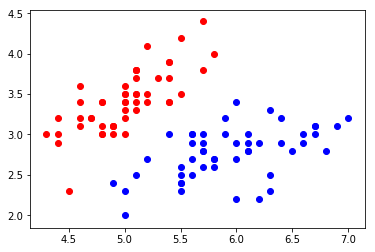

In [6]:
plt.scatter(X[y==0, 0], X[y==0, 1], color='r')
plt.scatter(X[y==1, 0], X[y==1, 1], color='b')
plt.show()

# 对数据进行标准化

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
standardScaler=StandardScaler()

standardScaler.fit(X)

X_standard= standardScaler.transform(X)

# 使用sklearn的SVM

In [9]:
# 使用sklearn中的支持向量机来分类
# support vector classifier 类
from sklearn.svm import LinearSVC

## 使用较大的C，也就是 hard margin SVM

In [10]:
# 参数C
# 是soft margin SVM的参数
# 类似于正则化的程度变量
# 当C 比较大的时候，就是hard margin svm
# 当C 比较小的时候，支持向量的容错空间就更大些

# 先取非常大的C 
svc=LinearSVC(C=1e9)
svc.fit(X_standard, y)

LinearSVC(C=1000000000.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [11]:
def plot_decision_boundary(model, axis):
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1] - axis[0])*100)).reshape(-1,1),
        np.linspace(axis[2], axis[3], int((axis[3] - axis[2])*100)).reshape(-1,1)
    )
    
    X_new=np.c_[x0.ravel(), x1.ravel()]
    
    y_predict=model.predict(X_new)
    
    zz=y_predict.reshape(x0.shape)
    
    from matplotlib.colors import ListedColormap
    
    custom_cmap=ListedColormap(["#EF9A9A", "#FFF59D", "#90CAF9"])
    
    plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)

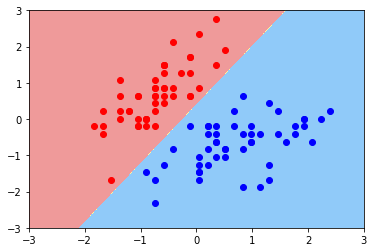

In [12]:
plot_decision_boundary(svc, axis=[-3, 3, -3, 3])
plt.scatter(X_standard[y==0, 0], X_standard[y==0, 1], color='r')
plt.scatter(X_standard[y==1, 0], X_standard[y==1, 1], color='b')
plt.show()

# 使用小的C，也就是soft margin SVM

In [13]:
svc2=LinearSVC(C=0.01)
svc2.fit(X_standard, y)

LinearSVC(C=0.01, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

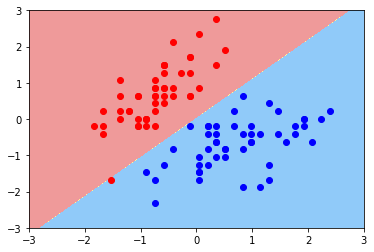

In [14]:
plot_decision_boundary(svc2, axis=[-3, 3, -3, 3])
plt.scatter(X_standard[y==0, 0], X_standard[y==0, 1], color='r')
plt.scatter(X_standard[y==1, 0], X_standard[y==1, 1], color='b')
plt.show()

In [15]:
svc.coef_

array([[ 4.03239321, -2.49295448]])

In [16]:
svc.intercept_

array([ 0.95364651])

## 从上面的结果，可以看出，是二维数组，这是因为，sklearn封装的SVM是支持多分类问题。

In [17]:
def plot_svc_decision_boundary(model, axis):
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1] - axis[0])*100)).reshape(-1,1),
        np.linspace(axis[2], axis[3], int((axis[3] - axis[2])*100)).reshape(-1,1)
    )
    
    X_new=np.c_[x0.ravel(), x1.ravel()]
    
    y_predict=model.predict(X_new)
    
    zz=y_predict.reshape(x0.shape)
    
    from matplotlib.colors import ListedColormap
    
    custom_cmap=ListedColormap(["#EF9A9A", "#FFF59D", "#90CAF9"])
    
    plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)
    
    w=model.coef_[0]
    b=model.intercept_[0]
    
    # 决策边界是  w0*x0 + w1*x1 + b = 0
    # 决策边界的上面是  w0*x0 + w1*x1 + b = 1
    # 决策边界的下面是 w0*x0 + w1*x1 + b = -1
    # 在二维空间中,
    # 决策边界： x1= -w0/w1 * x0 - b/w1
    # 上面的边界： x1=- w0/w1 * x0 -b/w1 - 1/w1
    # 下面的边界： x1 = wo/w1 * x0 - b/w1 + 1/w1
    
    plot_x =np.linspace(axis[0], axis[1], 200)
    up_y = -w[0]/w[1] * plot_x - b/w[1] - 1/w[1]
    down_y = -w[0]/w[1] * plot_x - b/w[1] + 1/w[1]
    
    # 这样，计算出来的y轴的值，会超过传入的axis中指定的y轴
    # 这里，需要进行过滤
    up_index = (up_y>=axis[2]) & (up_y<=axis[3])
    down_index=(down_y>=axis[2]) & (down_y<=axis[3])
    
    plt.plot(plot_x[up_index], up_y[up_index], color='black')
    plt.plot(plot_x[down_index], down_y[down_index], color='black')

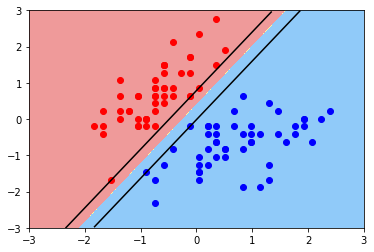

In [18]:
plot_svc_decision_boundary(svc, axis=[-3, 3, -3, 3])
plt.scatter(X_standard[y==0, 0], X_standard[y==0, 1], color='r')
plt.scatter(X_standard[y==1, 0], X_standard[y==1, 1], color='b')
plt.show()

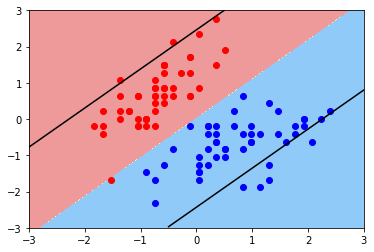

In [19]:
plot_svc_decision_boundary(svc2, axis=[-3, 3, -3, 3])
plt.scatter(X_standard[y==0, 0], X_standard[y==0, 1], color='r')
plt.scatter(X_standard[y==1, 0], X_standard[y==1, 1], color='b')
plt.show()